# [![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/skojaku/applied-soft-comp/blob/master/notebooks/doc2vec.ipynb)

# Doc2Vec

Let us have a hands-on implementation of Doc2Vec using the `gensim` library.
Our sample documents are:

In [30]:
# Uncomment the following line to install the required packages
# !pip install networkx gensim tqdm nltk bokeh faiss-cpu

In [31]:
# Sample documents
documents = [
    "Machine learning is a subset of artificial intelligence",
    "Deep learning uses neural networks with multiple layers",
    "Natural language processing deals with text and speech",
    "Computer vision focuses on image and video analysis",
    "Reinforcement learning involves agents making decisions"
]

We will first import the necessary libraries.

In [32]:
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from nltk.tokenize import word_tokenize

In gensim doc2vec, we need to prepare the documents in the form of `TaggedDocument`.

In [33]:
# Prepare documents
tagged_docs = []
for i, doc in enumerate(documents):
    tagged_doc = TaggedDocument(
        words=word_tokenize(doc.lower()), # tokenize the document
        tags=[str(i)] # tag the document with its index
    )
    tagged_docs.append(tagged_doc)

We added "tags" along with the words. The "tag" is used to identify the document.

```{tip}
`word_tokenize` is a function from the `nltk` library that tokenizes the document into words.
For example, "Machine learning is a subset of artificial intelligence" is tokenized into `['machine', 'learning', 'is', 'a', 'subset', 'of', 'artificial', 'intelligence']`.
```

Second, we need to train the Doc2Vec model.

In [34]:
# Train Doc2Vec model
model = Doc2Vec(tagged_docs,
                vector_size=50, # dimension of the document vector
                window=2, # context window size
                min_count=1, # ignore words that appear less than this
                epochs=300,
                dm=1, # 0: PV-DBOW, 1: PV-DM
                )

# Common hyperparameters to tune:
# - vector_size: Higher dimensions can capture more complex relationships but need more data
# - window: Larger windows capture broader context but increase computation
# - dm_concat: 1 for concatenation, 0 for averaging in PV-DM
# - negative: Number of negative samples (default: 5)
# - alpha: Initial learning rate

This generates the model along with the word and document vectors.

One of the interesting features of Doc2Vec is that it can generate an embedding for a new unseen document.
This can be done by using the `infer_vector` method.

```{tip}
A new document vector is generated by fixing the word vectors and optimizing the document vector through gradient descent.
The inference process:
1. Initialize a random document vector
2. Perform gradient updates using the pre-trained word vectors
3. Return the optimized document vector
See {footcite}`le2014distributed` for more details.
```

In [35]:
# Find similar documents
test_doc = "AI systems use machine learning algorithms"
test_vector = model.infer_vector(word_tokenize(test_doc.lower()))

Now, let us find the most similar documents to the test document.

In [36]:
similar_docs = model.dv.most_similar([test_vector])

print("Similar documents to:", test_doc, "\n")
for doc_id, similarity in similar_docs:
    print(f"Document {doc_id}: {documents[int(doc_id)]}")
    print(f"Similarity: {similarity:.4f}\n")

Similar documents to: AI systems use machine learning algorithms 

Document 0: Machine learning is a subset of artificial intelligence
Similarity: 0.9877

Document 3: Computer vision focuses on image and video analysis
Similarity: 0.9735

Document 2: Natural language processing deals with text and speech
Similarity: 0.9720

Document 1: Deep learning uses neural networks with multiple layers
Similarity: 0.9676

Document 4: Reinforcement learning involves agents making decisions
Similarity: 0.9578



## 🔥 Exercises 🔥

1. Create a search engine using Doc2Vec. This search engine takes a query document and returns the most similar documents.

2. Perform topic classification based on the document vectors.

3. Visualization Challenge
   - Create t-SNE/UMAP/PCA visualization of the document vectors.
   - Color-code by topic
   - Analyze clustering patterns

In [37]:
sample_documents = [
    # Technology
    {"text": "Artificial intelligence is transforming the way we interact with computers", "topic": "technology"},
    {"text": "Machine learning algorithms can identify patterns in complex datasets", "topic": "technology"},
    {"text": "Deep learning models have achieved human-level performance in image recognition", "topic": "technology"},
    {"text": "Neural networks are inspired by biological brain structures", "topic": "technology"},
    {"text": "Natural language processing enables machines to understand human text", "topic": "technology"},
    {"text": "Computer vision systems can detect objects in real-time video streams", "topic": "technology"},
    {"text": "Reinforcement learning agents learn through interaction with environments", "topic": "technology"},
    {"text": "Edge computing brings AI processing closer to data sources", "topic": "technology"},
    {"text": "Transfer learning reduces the need for large training datasets", "topic": "technology"},
    {"text": "Automated machine learning optimizes model architecture search", "topic": "technology"},
    {"text": "Explainable AI helps understand model decision-making processes", "topic": "technology"},
    {"text": "Federated learning enables privacy-preserving model training", "topic": "technology"},
    {"text": "Quantum computing promises breakthroughs in optimization problems", "topic": "technology"},
    {"text": "Cloud platforms provide scalable computing resources", "topic": "technology"},
    {"text": "GPUs accelerate deep learning model training significantly", "topic": "technology"},

    # Science
    {"text": "Quantum mechanics explains behavior at the atomic scale", "topic": "science"},
    {"text": "DNA sequencing reveals genetic variations between organisms", "topic": "science"},
    {"text": "Chemical reactions transfer energy between molecules", "topic": "science"},
    {"text": "Gravitational waves provide insights into cosmic events", "topic": "science"},
    {"text": "Particle accelerators probe fundamental physics laws", "topic": "science"},
    {"text": "Cell biology studies the basic units of life", "topic": "science"},
    {"text": "Evolutionary theory explains species adaptation", "topic": "science"},
    {"text": "Neuroscience investigates brain structure and function", "topic": "science"},
    {"text": "Climate models predict long-term weather patterns", "topic": "science"},
    {"text": "Geological processes shape Earth's surface features", "topic": "science"},
    {"text": "Conservation biology aims to protect endangered species", "topic": "science"},
    {"text": "Astronomy studies celestial objects and phenomena", "topic": "science"},
    {"text": "Biochemistry examines cellular metabolic processes", "topic": "science"},
    {"text": "Physics laws describe fundamental force interactions", "topic": "science"},
    {"text": "Scientific method tests hypotheses through experiments", "topic": "science"},

    # Business
    {"text": "Market analysis guides investment decisions", "topic": "business"},
    {"text": "Strategic planning sets long-term company goals", "topic": "business"},
    {"text": "Financial reports track business performance metrics", "topic": "business"},
    {"text": "Supply chain optimization reduces operational costs", "topic": "business"},
    {"text": "Customer relationship management builds loyalty", "topic": "business"},
    {"text": "Digital marketing reaches targeted audiences online", "topic": "business"},
    {"text": "Product development responds to market demands", "topic": "business"},
    {"text": "Risk management protects business assets", "topic": "business"},
    {"text": "Human resources develops employee talent", "topic": "business"},
    {"text": "Sales strategies drive revenue growth", "topic": "business"},
    {"text": "Competitive analysis identifies market opportunities", "topic": "business"},
    {"text": "Business analytics inform decision-making processes", "topic": "business"},
    {"text": "Brand management builds company reputation", "topic": "business"},
    {"text": "Operations management streamlines production processes", "topic": "business"},
    {"text": "Innovation strategy drives business transformation", "topic": "business"}
]

1. Create a search engine using Doc2Vec. This search engine takes a query document and returns the most similar documents.


In [67]:
# Train Doc2Vec model
documents = [doc['text'] for doc in sample_documents ]
tagged_docs = [TaggedDocument(words=word_tokenize(doc.lower()), tags=[str(i)]) for i, doc in enumerate(documents)]
model = Doc2Vec(tagged_docs, vector_size=30, window=10, min_count=0, epochs=300, dm=0)

# Search engine
def search_engine(query, documents, topk = 1):
    test_vector = model.infer_vector(word_tokenize(query.lower()))
    similar_docs = model.dv.most_similar([test_vector], topn=topk)
    return [{"doc":documents[int(doc_id)], "similarity":similarity} for doc_id, similarity in similar_docs]

# Test the search engine
search_engine("AI systems use machine learning algorithms", documents)

[{'doc': 'Machine learning algorithms can identify patterns in complex datasets',
  'similarity': 0.8000247478485107}]


2. Perform topic classification based on the document vectors.


In [68]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

# Prepare data
X = model.dv.vectors
y= [doc['topic'] for doc in sample_documents] # topic is the label
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train logistic regression model
lr = LogisticRegression()
lr.fit(X_train, y_train)

# Evaluate model
accuracy = lr.score(X_test, y_test)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.78



3. Visualization Challenge
   - Create t-SNE/UMAP/PCA visualization of the document vectors.
   - Color-code by topic
   - Analyze clustering patterns

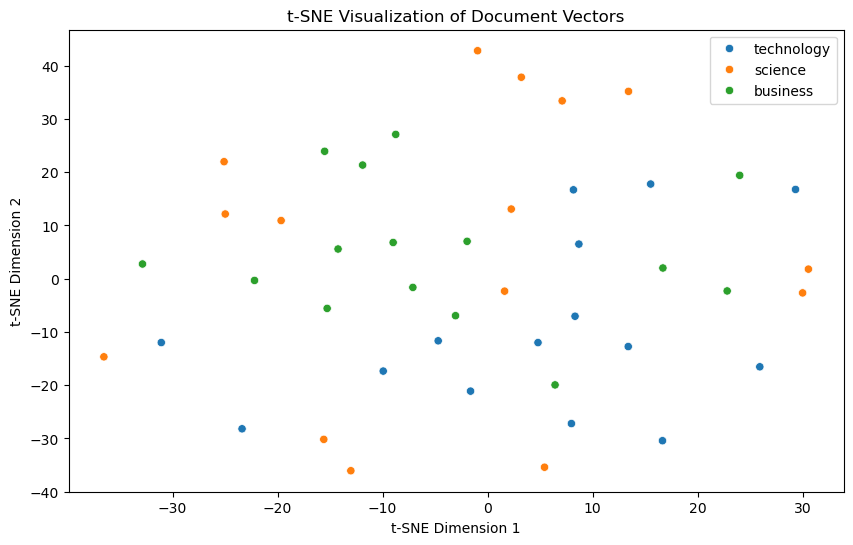

In [66]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


X = model.dv.vectors #np.vstack([model.infer_vector(word_tokenize(doc['text'].lower())) for doc in sample_documents])
y = np.array([doc['topic'] for doc in sample_documents])

# Visualize document vectors using t-SNE
tsne = TSNE(n_components=2, random_state=42, perplexity=10)
X_tsne = tsne.fit_transform(X)

# Plot the t-SNE visualization
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=y, palette='tab10')
plt.title('t-SNE Visualization of Document Vectors')
plt.xlabel('t-SNE Dimension 1')
plt.ylabel('t-SNE Dimension 2')
plt.show()